<a href="https://colab.research.google.com/github/tutsilianna/Introduction_to_ML_and_Advanced_ML_Python/blob/main/Entropy.%20Decision%20Trees%20(DTs)/Entropy_Decision_Trees_(DTs)_%7C_Exercise_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using decision trees

# Dataset description

In this assignment, we will look at decision trees for the classification problem, and talk about how to deal with unbalanced datasets.

The provided dataset contains information about accepted offers on loans in **Thera-Bank**. The main customers of the bank use the bank to deposit their money in it, i.e. they are depositors. At the same time, the big profit to the bank are the creditors - people who take a loan from the bank. Therefore, the bank wants to form favorable loan offers for its depositors. The bank's campaign for depositors last year showed that the conversion rate was more than 9,6%.

This prompted the marketing department to develop campaigns with improved target marketing to increase the probability of success with, of course, a minimal budget. The department would like to develop a classifier to help them identify potential customers who are more likely to purchase a loan. This would increase the probability of success while reducing the cost of the campaign.

The dataset contains both customer information and information about their response to the previous year's campaign:

*   **ID**: client ID

*   **Age**: Age

*   **Experience**: Work experience

*   **Income**: Annual income (in thousands)

*   **ZIP Code**: Residence index

*   **Family**: Family size

*   **CCAvg**: Average credit card spending per month (in thousands)

*   **Education**: Level of education (1: Bachelor's degree, 2: Master's degree, 3: something more)

*   **Mortgage**: Value of mortgage, if any (in thousands)

*   **Securities Account**: Existence of a securities account

*   **CD Account**: Existence of a certificate of deposit

*   **Online**: Whether the client uses internet banking

*   **CreditCard**: Whether the client uses a credit card issued by this bank

*   **Personal Loan**: Whether the client has accepted a personalized loan offer (target feature)

# Exploratory data analysis

Read the dataset into a dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/itmo|AI_cources/Bank_Personal_Loan_Modelling_train.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,409,60,36,89,91745,2,2.8,1,0,0,0,0,1,0
1,3738,44,19,30,91423,1,0.5,3,0,0,0,0,1,0
2,3890,26,0,19,93014,1,0.1,2,121,0,0,0,1,0
3,569,34,9,41,92101,2,0.1,1,161,0,0,0,1,1
4,1042,56,32,51,92780,4,1.5,1,0,0,0,0,0,0


Use the <code>.describe()</code> method to explore the dataset "from a bird's eye view".

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


The dataset contains 14 features, 1 of which is the target feature.

1 nominal feature: **ID**

5 numeric features: **Age**, **Experience**, **Income**, **CCAvg**, **Mortgage**

3 categorical features: **Family**, **Education**, **ZIP Code**

5 boolean features: **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**

There are no missing values.

Experience contains some negative values.

Remove the ID column, we won't need it.

In [5]:
df.drop(axis=1, columns=['ID'], inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,36,89,91745,2,2.8,1,0,0,0,0,1,0
1,44,19,30,91423,1,0.5,3,0,0,0,0,1,0
2,26,0,19,93014,1,0.1,2,121,0,0,0,1,0
3,34,9,41,92101,2,0.1,1,161,0,0,0,1,1
4,56,32,51,92780,4,1.5,1,0,0,0,0,0,0


It makes sense to try to catch any correlations or lack thereof.

Build a correlation matrix.

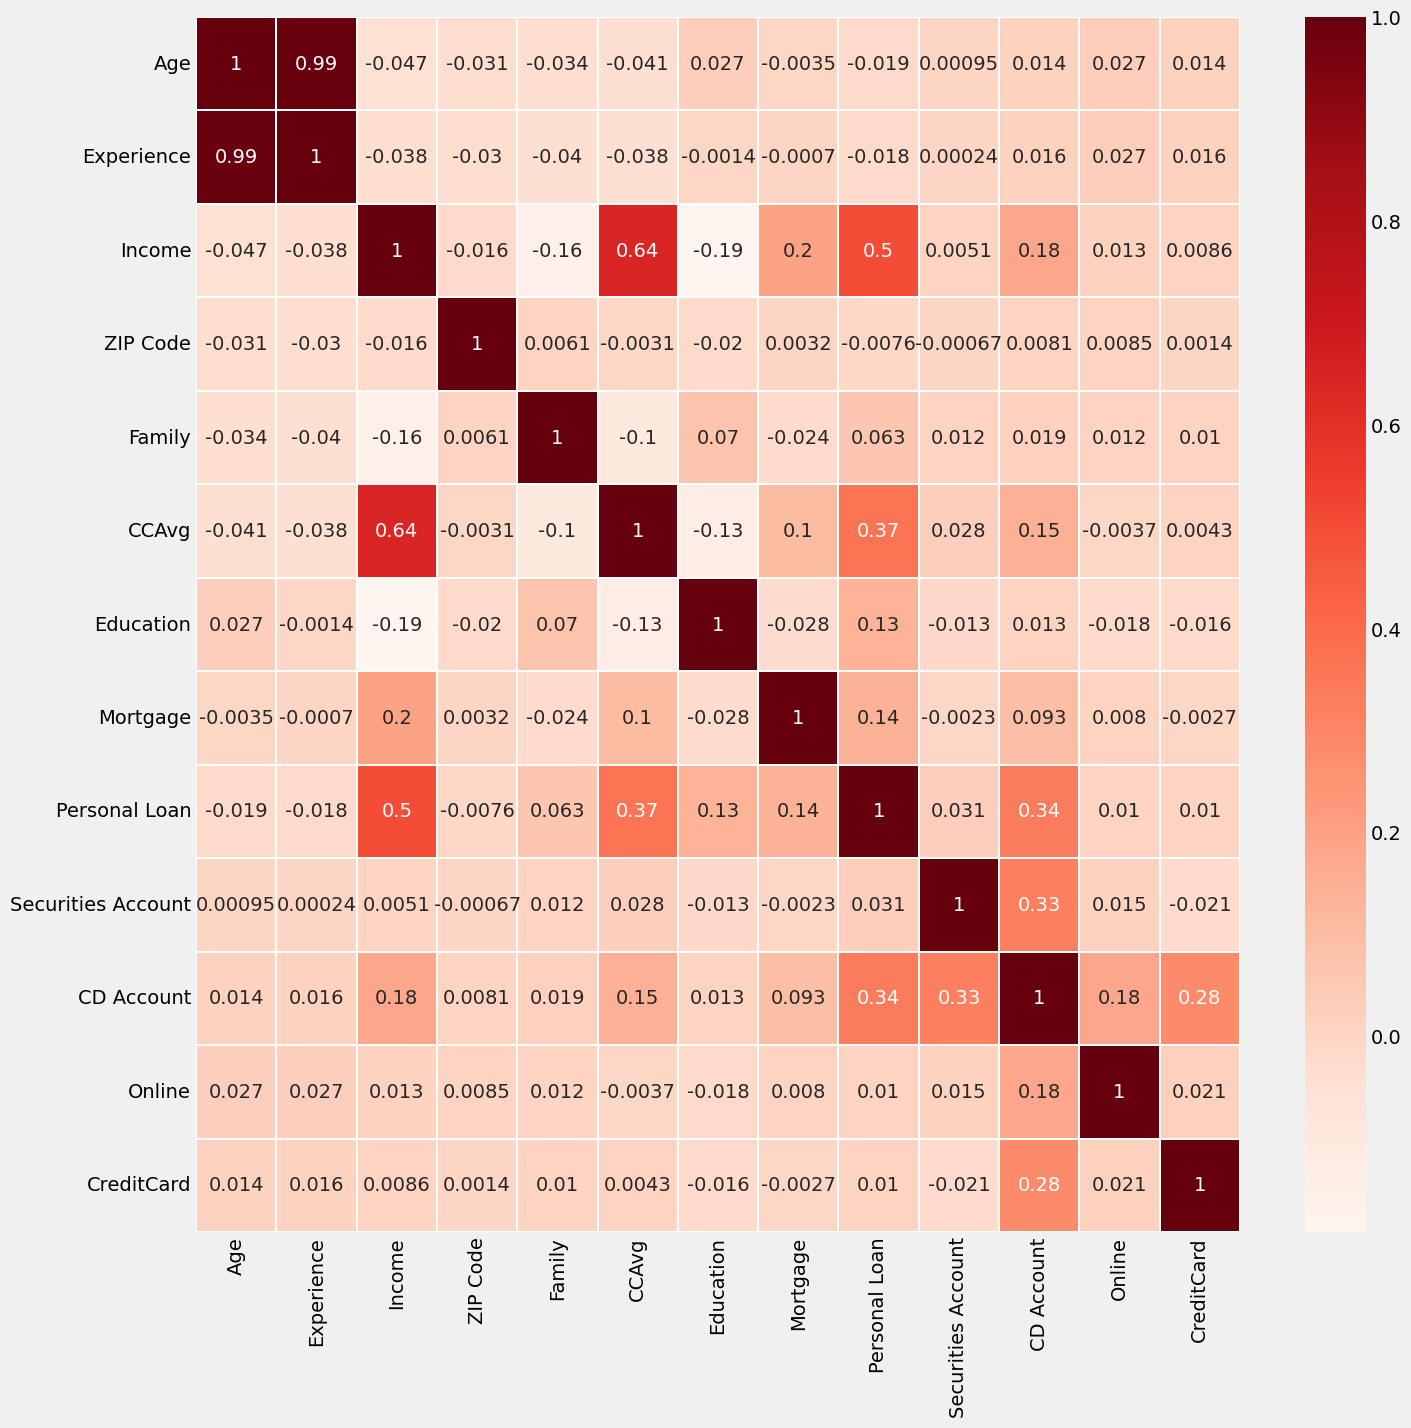

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

Identify the two most correlated features.

In [7]:
corr_matrix = df.corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

print(sol)

Age            Experience            0.994134
Income         CCAvg                 0.641660
               Personal Loan         0.497333
CCAvg          Personal Loan         0.365553
Personal Loan  CD Account            0.336931
                                       ...   
Experience     Education             0.001394
Age            Securities Account    0.000950
Experience     Mortgage              0.000700
ZIP Code       Securities Account    0.000667
Experience     Securities Account    0.000239
Length: 78, dtype: float64


Identify the feature that is least correlated (almost uncorrelated) with the other features (including target). Remove this feature from consideration.

Enter the name of the removed feature.

In [8]:
columns = list(df.columns)

corr = {column: [] for column in columns}

for column in columns:
    for index, value in sol.items():
        if column in index:
            corr[column].append(value)

for column in columns:
    print(column, sum([round(x,2) for x in corr[column]]))

Age 1.2400000000000002
Experience 1.2300000000000002
Income 2.01
ZIP Code 0.14
Family 0.54
CCAvg 1.6000000000000003
Education 0.6600000000000001
Mortgage 0.5900000000000001
Personal Loan 1.6400000000000001
Securities Account 0.45000000000000007
CD Account 1.62
Online 0.3400000000000001
CreditCard 0.40000000000000013


ZIP Code

In [9]:
df.drop(axis=1, columns=['ZIP Code'], inplace=True)

# Preliminary data preparation

## Feature modification

It is worth dealing with the <code>Experience</code> feature. You can see that experience correlates with age. However, there are negative values in the <code>Experience</code> column. It makes sense to "shift" the values in this column. Add the same number to all values in the <code>Experience</code> column so that the minimum value is equal to $0$.

Calculate the sample mean of the <code>Experience</code> column after transformation.

In [10]:
df['Experience'] = abs(df['Experience'].min()) + df['Experience']

In [11]:
round(df['Experience'].mean(), 3)

23.196

Similarly, it makes sense to modify the <code>CCAvg</code> feature. Since the annual income is considered, the value of spending should be considered for the whole year.

Calculate the sample mean of the <code>CCAvg</code> column after transformation.

In [12]:
df['CCAvg'] =  df['CCAvg']*12

In [13]:
round(df['CCAvg'].mean(), 3)

23.062

## Determining outliers

Construct boxplots for all predictors. We recommend using the <code>sns.boxplot()</code>. Identify the feature from the boxplot image in your individual assignment.

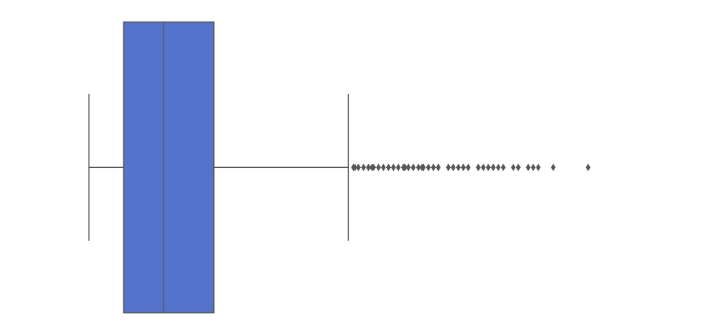

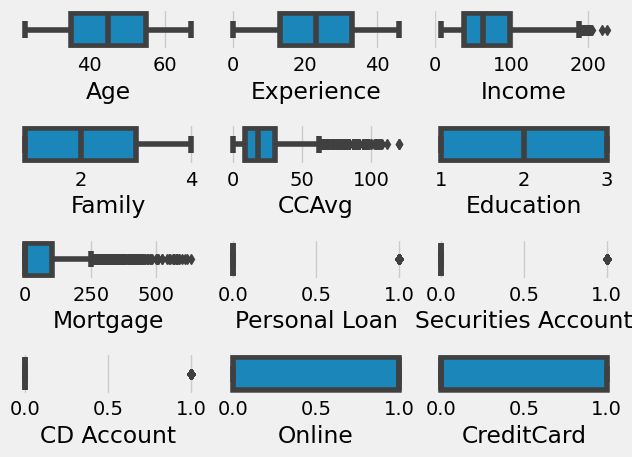

In [14]:
names = list(df.columns)
f, axes = plt.subplots(round(len(names)/3), 3)
y = 0;
for name in names:
    i, j = divmod(y,3)
    sns.boxplot(x=df[name], ax=axes[i, j])
    y = y + 1

plt.tight_layout()
plt.show()

CCAvg

Identify the feature containing the largest number of outliers. Enter the name of the feature.

Mortgage

It makes sense to work with this feature. For this purpose, the following statistical considerations can be used. If you subtract the sample mean from the data, and then divided by the standard deviation, then, using the $68-95-99.7$ rule under the assumption of normality of distribution, we can discard the tails that are too far from zero.
Construct a histogram of the distribution of values within this feature.

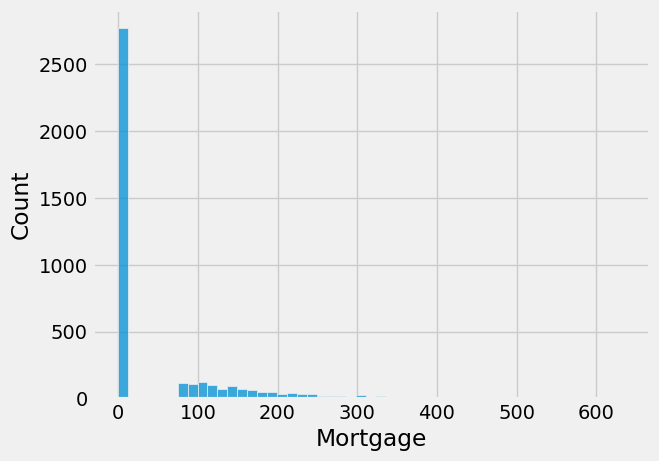

In [15]:
sns.histplot(data=df, x='Mortgage');

Obviously, among the values of this feature there are a small number of values that lie "far away from the trend". We can use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html"><code>z-score</code></a> function from the <code>scipy</code> library.

Recalling the course of probability theory, it becomes clear that about $99.7\%$ of the normal distribution will be contained in the interval $[-3\sigma, 3\sigma]$. Determine the number of elements whose modulus of <code>z-score</code> is greater than $3$.

In [16]:
from scipy import stats

df['zscore'] = stats.zscore(list(df['Mortgage']))

df['zscore'] = np.where(df["zscore"].abs() > 3, 1, 0) # 1 - z-score is greater than  3 .

df['zscore'].value_counts()

0    3917
1      83
Name: zscore, dtype: int64

So, there are not very many outliers, so they can simply be discarded from the provided dataset. Enter the remaining number of rows in the dataset.

In [17]:
df = df.loc[df['zscore'] == 0]
df.drop(axis=1, columns=['zscore'], inplace=True)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,33.6,1,0,0,0,0,1,0
1,44,22,30,1,6.0,3,0,0,0,0,1,0
2,26,3,19,1,1.2,2,121,0,0,0,1,0
3,34,12,41,2,1.2,1,161,0,0,0,1,1
4,56,35,51,4,18.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,37,14,59,4,2.4,3,0,0,0,0,0,0
3996,36,13,91,1,18.0,3,289,0,0,0,1,0
3997,57,34,131,2,32.4,1,0,0,0,0,0,0
3998,40,18,83,1,12.0,3,0,0,0,0,0,0


# Model building

# Basic algorithm

Use <code>train_test_split</code> to split the dataset into training and test samples with the parameters `test_size=0.2, random_state=27`. Use stratification by column `Personal Loan`.

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=27, stratify=df['Personal Loan'])

In [19]:
y_train = train['Personal Loan']
y_test = test['Personal Loan']

X_train = train.drop(axis=1, columns=['Personal Loan'])
X_test = test.drop(axis=1, columns=['Personal Loan'])

Train the `DecisionTreeClassifier()` model on the training dataset with the following parameters: `random_state=27, criterion='gini'`. Evaluate the model on test dataset. Compute <code>f1_score</code> of the model on test dataset.

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc1 = DecisionTreeClassifier(random_state=27, criterion='gini').fit(X_train, y_train)

In [21]:
from sklearn.metrics import f1_score

y_pred1 = dtc1.predict(X_test)
round(f1_score(y_test, y_pred1), 3)

0.867

Train the `DecisionTreeClassifier()` model on the training dataset with the following parameters: `random_state=27, criterion='entropy'`. Evaluate the model on test dataset. Compute `f1_score() `of the model on test dataset.

In [22]:
dtc2 = DecisionTreeClassifier(random_state=27, criterion='entropy').fit(X_train, y_train)

y_pred2 = dtc2.predict(X_test)
round(f1_score(y_test, y_pred2), 3)

0.853

## Consideration of class ratio imbalance

And now, if we remember that the dataset is unbalanced, we can specify an additional parameter <code>class_weight</code>. Train the <code>DecisionTreeClassifier</code> model on the training dataset with the parameters from your individual assignment. Compute <code>f1_score</code> of the model on test dataset.

In [23]:
dtc3 = DecisionTreeClassifier(random_state=27, criterion='gini', class_weight='balanced').fit(X_train, y_train)

y_pred3 = dtc3.predict(X_test)
round(f1_score(y_test, y_pred3), 3)

0.881

In [24]:
dtc4 = DecisionTreeClassifier(random_state=27, criterion='entropy', class_weight='balanced').fit(X_train, y_train)

y_pred4 = dtc4.predict(X_test)
round(f1_score(y_test, y_pred4), 3)

0.881

## Upsampling of training dataset

In addition to the obvious assignment of weights to unbalanced classes, we can use the algorithm <code>SMOTE</code>. It receives instances of all classes with their labels as input, and in turn tries to extrapolate the data distribution of that class itself based on them. It then samples new class objects until the number of objects of each class is the same.

It turns out that in this case a balanced sample will be obtained, and there will be no need to fiddle with weights and so on.

Determine the proportion of elements of class $0$ of the training dataset.

In [25]:
round(df['Personal Loan'].value_counts()[0] / df.shape[0], 3)

0.911

Using the <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html"><code>SMOTE</code></a> class from the <code>imblearn.over_sampling</code> module, balance the training dataset with the parameters `random_state=27`.

In [27]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)

In [28]:
#X = df.copy(deep=True)
#X.drop(axis=1, columns=['Personal Loan'], inplace=True)

#y = df['Personal Loan']

X_res, y_res = sm.fit_resample(X_train, y_train)

In [30]:
y_res.value_counts()

0    2855
1    2855
Name: Personal Loan, dtype: int64

Make sure that the dataset now contains the same number of representatives of both classes.

Enter the number of objects of class $1$ of the training dataset after the upsampling.

In [34]:
y_res.value_counts()[1]

2855

Train the `DecisionTreeClassifier()` model on the training dataset after upsampling with the following parameters: `random_state=27, criterion='gini'`. Evaluate the model on test dataset. Compute `f1_score()` of the model on test dataset.

In [37]:
dtc5 = DecisionTreeClassifier(random_state=27, criterion='gini').fit(X_res, y_res)

y_pred5 = dtc5.predict(X_test)
round(f1_score(y_test, y_pred5), 3)

0.842

Train the `DecisionTreeClassifier()` model on the training dataset after upsampling with the following parameters: `random_state=27, criterion='entropy'`. Evaluate the model on test dataset.

Compute `f1_score()` of the model on test dataset.

In [35]:
dtc6 = DecisionTreeClassifier(random_state=27, criterion='entropy').fit(X_res, y_res)

y_pred6 = dtc6.predict(X_test)
round(f1_score(y_test, y_pred6), 3)

0.829